Thuật toán Random Tree Forest:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

Data Collection

In [2]:
wine_dataset= pd.read_csv('winequality-red.csv')

In [3]:
print("Number of rows and columns",wine_dataset.shape)
print("first 5 rows of dataset:\n",wine_dataset.head())
print("View about sum of instances and their types:\n",wine_dataset.info())
print("Missing values:",wine_dataset.isnull().sum())

Number of rows and columns (1599, 12)
first 5 rows of dataset:
    fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  


Statistical Data and Visualization

In [4]:
#Get a general overview about our dataset
wine_dataset.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


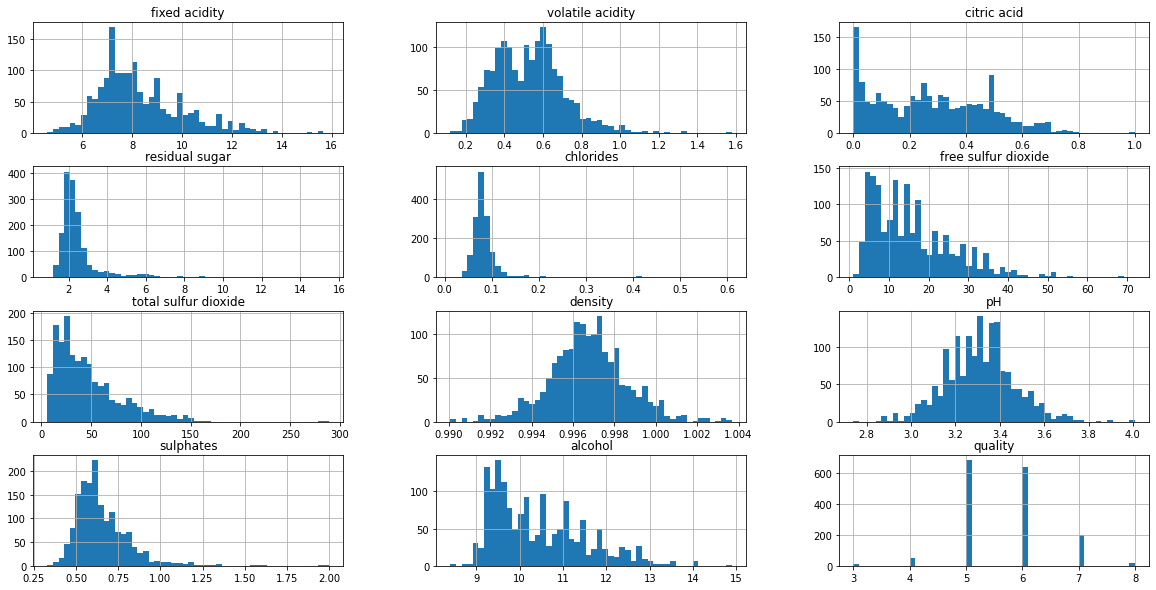

In [5]:
#Visualiztion about our dataset(we care about quality so we can see number of values in the quality)
wine_dataset.hist(bins=50, figsize=(20,10))
plt.show()

<AxesSubplot:xlabel='quality', ylabel='volatile acidity'>

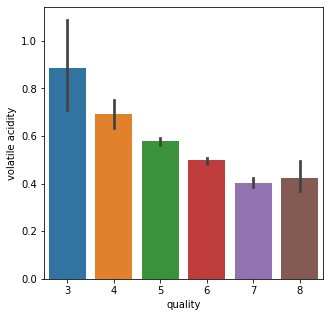

In [13]:
#volatile acidity vs Quality(from here we can see acidity high then quality will be not good)
plot =plt.figure(figsize=(5,5))
sns.barplot(x='quality',y='volatile acidity',data=wine_dataset)

Correlation (Tìm hiểu về mối tương quan giữa các cột)

1.Positive Correaltion
2.Negative Correlation

<AxesSubplot:>

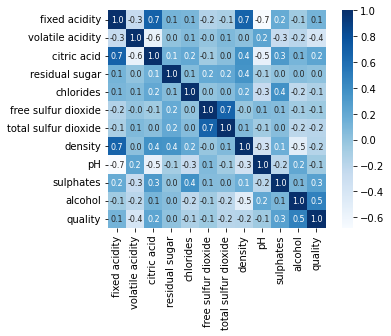

In [11]:
correaltion = wine_dataset.corr()

#constructing a hearmap to understand correaltions between columns
sns.heatmap(correaltion,
            cbar= True, #whether to draw a colorbar
            square= True, #if True each sell will be square-shaped
            fmt= '.1f', #format text when adding annotations (quy định hiển thị số thập phân)
            annot= True, #add annotations
            annot_kws= {'size': 8}, #keywords for annotations (giá trị trong mỗi cái ô)
            cmap='Blues' #mapping from data values to color space
)


#Kết luận: Nhìn vào biểu đồ rõ ràng là giá trị volatile acidity có liên quan đến giá trị quality nhất(vì -0.4 là thấp nhất).

Data Preprocessing

In [15]:
X=wine_dataset.drop('quality',axis=1)
print(X)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  

Label Binarization

In [16]:
Y=wine_dataset['quality'].apply(lambda y_value: 1 if y_value>=7 else 0)
print(Y)

0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: quality, Length: 1599, dtype: int64


Train & Test Data

In [18]:
X_train, X_test, Y_train, Y_test= train_test_split(X,Y,test_size=0.2, random_state=2)
print(Y.shape, Y_train.shape, Y_test.shape)

(1599,) (1279,) (320,)


Model Training: Random Forest Classifier

In [23]:
model= RandomForestClassifier()

model.fit(X_train.values,Y_train.values)


#Sau bước này có thể thực hiện thay đổi số lượng Decision Trees có trong Random Forest và gọi model.score(X_test.values,Y_test.values) để thấy sự khác biệt

RandomForestClassifier()

Model Evaluation

In [25]:
#Calculate accuracy on test data
X_test_prediction =model.predict(X_test.values)
test_accuracy_score = accuracy_score(X_test_prediction,Y_test)
print(test_accuracy_score)   #-->93% means good accuracy

0.915625


Building a Predictive System

In [27]:
input_data = (8.5,0.28,0.56,1.8,0.092,35.0,103.0,0.9969,3.3,0.75,10.5)

#changing the input data to numpy array
input_data_to_numpy_array=np.asarray(input_data)

#reshape the data as we are predicting the label for only one instance
input_data_reshaped = input_data_to_numpy_array.reshape(1,-1)

prediction =model.predict(input_data_reshaped)
#print(prediction)

if(prediction[0] == 1):
    print("High Quality Wine")
else:
    print("Low Quality Wine")

High Quality wine
